# Probabilistic Programming

In [4]:
import numpy as np
import pymc3 as pm
import theano.tensor as tt

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [lambda]
Sampling 4 chains: 100%|██████████| 60000/60000 [00:04<00:00, 12742.19draws/s]
The number of effective samples is smaller than 25% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c26c4a9b0>,
      dtype=object)

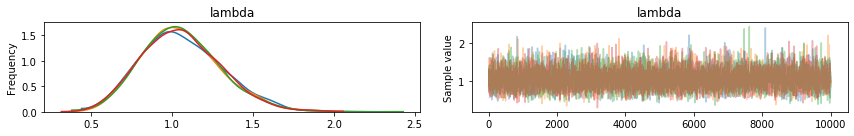

In [5]:
# Poisson Conjugate

data = [1, 1.5, .25, 2, 1.2, 1.4, 1.6, 1.8, .35]
alpha = sum(data)
beta = len(data)

with pm.Model() as model:
    lambda_ = pm.Gamma('lambda', alpha, beta)
    rate = pm.Poisson('rate', lambda_, observed=data)
    
with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step)
    
pm.traceplot(trace)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [mu]
>Metropolis: [sigma]
Sampling 4 chains: 100%|██████████| 60000/60000 [00:06<00:00, 9821.34draws/s] 
The number of effective samples is smaller than 25% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2784bcf8>,
      dtype=object)

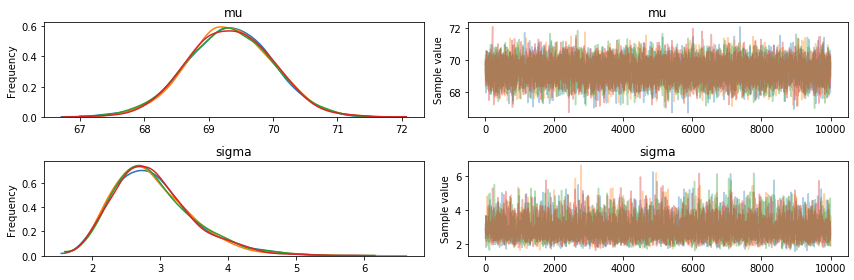

In [6]:
# Gaussian Process

data = [73.847017017515,
        68.7819040458903,
        74.1101053917849,
        71.7309784033377,
        69.8817958611153,
        67.2530156878065,
        68.7850812516616,
        68.3485155115879,
        67.018949662883,
        63.4564939783664]

n = len(data)
mu_prior = np.mean(data)
std_prior = np.std(data)
alpha = len(data)/2
beta = std_prior**2/2

with pm.Model() as model:
    sigma = pm.InverseGamma('sigma', alpha, beta)
    mu = pm.Normal('mu', mu=mu_prior, sd=std_prior/np.sqrt(n))
    weight = pm.Normal('weight change', mu=mu, sd=sigma, observed=data)#likelihood

with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step)
    
pm.traceplot(trace)